In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ardi_data = pd.read_csv("Cleaned_1_data.csv")

ardi_data

YearStart  YearEnd LocationAbbr   LocationDesc DataSource  \
0           2015     2019           WV  West Virginia       ARDI   
1           2015     2019           WV  West Virginia       ARDI   
2           2015     2019           US  United States       ARDI   
3           2015     2019           US  United States       ARDI   
4           2015     2019           WV  West Virginia       ARDI   
...          ...      ...          ...            ...        ...   
13142       2015     2019           WY        Wyoming       ARDI   
13143       2015     2019           WY        Wyoming       ARDI   
13144       2015     2019           WY        Wyoming       ARDI   
13145       2015     2019           WY        Wyoming       ARDI   
13146       2015     2019           WY        Wyoming       ARDI   

      ConditionType                    Category        Cause_of_Death  \
0           Chronic                       Total  Total for All Causes   
1             Total                       Total  Total for All Causes   
2             Acute  Alcohol-Related Poisonings     Alcohol poisoning   
3             Acute  Alcohol-Related Poisonings     Alcohol poisoning   
4             Acute                       Total  Total for All Causes   
...             ...                         ...                   ...   
13142       Chronic                       Total  Total for All Causes   
13143         Total                       Total  Total for All Causes   
13144         Acute                       Total  Total for All Causes   
13145       Chronic                       Total  Total for All Causes   
13146         Total                       Total  Total for All Causes   

       Data_Value_Alt           Effect     ConsumptionPattern      Sex  \
0                 0.0  Harmful Effects  Excessive Alcohol Use   Female   
1                 7.0  Harmful Effects  Excessive Alcohol Use   Female   
2                13.0  Harmful Effects  Excessive Alcohol Use   Female   
3              1761.0  Harmful Effects  Excessive Alcohol Use     Male   
4               367.0  Harmful Effects        Any Alcohol Use     Male   
...               ...              ...                    ...      ...   
13142            83.0  Harmful Effects        Any Alcohol Use  Overall   
13143           102.0  Harmful Effects        Any Alcohol Use  Overall   
13144            19.0  Harmful Effects  Excessive Alcohol Use  Overall   
13145            77.0  Harmful Effects  Excessive Alcohol Use  Overall   
13146            96.0  Harmful Effects  Excessive Alcohol Use  Overall   

       AgeGroup  AgeGroup_Cat  
0       Overall       Overall  
1       Overall       Overall  
2      Under 21      Under 21  
3       Overall       Overall  
4       Overall       Overall  
...         ...           ...  
13142       65+  65 and older  
13143       65+  65 and older  
13144       65+  65 and older  
13145       65+  65 and older  
13146       65+  65 and older  

[13147 rows x 14 columns]

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# # Load the dataset from ardi_data
# df = pd.read_csv('ardi_data.csv')

# Encode categorical variables
label_encoders = {}
categorical_columns = ['AgeGroup','LocationAbbr', 'ConditionType', 'Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on Sex using SVR
def predict_by_sex_svr(sex):
    df_filtered = ardi_data[ardi_data['Sex'] == sex]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['AgeGroup','LocationAbbr', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = SVR(kernel='linear')  # Using a linear kernel for SVR
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    linear_mse = mean_squared_error(y_test, y_pred)
    linear_mae = mean_absolute_error(y_test, y_pred)

    linear_r2 = r2_score(y_test, y_pred)
    
    return y_pred, linear_mse, linear_mae, linear_r2

# Example prediction using SVR based on Sex
sex = 'Male'

prediction, linear_mse, linear_mae, linear_r2 = predict_by_sex_svr(sex)
print(f"SVR Predicted values for '{sex}':", prediction)
print("Mean Squared Error (MSE):", linear_mse)
print("Mean Absolute Error (MAE):", linear_mae)
print("R-squared (R2):", linear_r2)


SVR Predicted values for 'Male': [162.58920847 133.33290523 165.31002219 106.67708925 138.15819423
 145.82594198 135.06433214  60.22445174 117.56725837 104.89261598
 122.61296564 155.66350082 175.39492773 133.50948211 106.83119957
  45.30505224 112.37297764  97.76757922  93.65299884  82.64885061
 107.920737   132.76744201 178.36308816 114.35175125 144.09451507
  61.18731537 110.2940534  140.13696784  93.90034554 181.33124858
 133.04765924 136.05560443 149.04144911 165.8047156   99.49900614
  78.93865008  47.53117255  87.96191877  90.43538579 111.13624413
 111.38359083 121.59014141 112.52017371 138.40554093 179.10512826
 134.56963874  86.34578955 176.13696784 111.62402329 113.85705785
 123.12092063 148.0520623  179.35247496 163.82594198 105.68770244
 108.31527978 163.33124858  67.47707564  94.39503895  85.73579845
 115.98302754 134.81698544 173.41615412 125.08643266 162.34186177
  45.75883191 107.6733903   75.93070489 162.83655517 113.1081035
  97.61054607  54.0407842  175.14758103 174.

In [4]:
# based on location Xgboost

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['AgeGroup', 'LocationAbbr', 'ConditionType', 'Category', 'Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on LocationAbbr using XGBoost
def predict_by_sex_xgboost(sex):
    df_filtered = ardi_data[ardi_data['Sex'] == sex]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['AgeGroup', 'LocationAbbr', 'ConditionType', 'Category', 'Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBRegressor()  # Using XGBoost for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    xgboost_mse = mean_squared_error(y_test, y_pred)
    xgboost_mae = mean_absolute_error(y_test, y_pred)
    xgboost_r2 = r2_score(y_test, y_pred)
    
    return y_pred, xgboost_mse, xgboost_mae, xgboost_r2

# Example prediction using XGBoost based on LocationAbbr
sex = 'Male'

prediction, xgboost_mse, xgboost_mae, xgboost_r2 = predict_by_sex_xgboost(sex)
print(f"XGBoost Predicted values for '{sex}':", prediction)
print("Mean Squared Error (MSE):", xgboost_mse)
print("Mean Absolute Error (MAE):", xgboost_mae)
print("R-squared (R2):", xgboost_r2)


XGBoost Predicted values for 'Male': [ 1.94918182e+02  3.08608570e+01  7.70372437e+02  1.52900009e+02
  7.12342407e+02  1.48273022e+03  2.19040344e+02  1.76388092e+02
  7.74925919e+01  3.63071785e+01 -7.37815552e+01  4.85646729e+02
  8.25106354e+01 -6.32961960e+01  1.83157150e+02  7.23706894e+01
  5.04470558e+01  1.13388763e+02  3.42721710e+02  7.98087845e+01
  7.53937531e+01 -8.57425766e+01  1.01252460e+03  1.11001198e+02
  4.50991089e+02  8.13898544e+01  9.48737488e+01  1.40227158e+02
  1.75097229e+02  2.29296127e+02  2.87391632e+02  2.25861328e+02
  5.49800262e+01  1.18420642e+03  1.47747452e+02  2.58827393e+02
  3.84707680e+01 -9.21731567e+00  6.77783890e+01  1.87730164e+02
  1.05404694e+02  1.88632584e+02  8.76825714e+00  3.94875244e+03
  1.42796313e+03  1.41129547e+02  2.02638412e+02  5.16451721e+02
  2.20392197e+02  3.41126129e+02  2.30270172e+02  1.86576221e+03
  1.10258313e+03  9.80877991e+02  2.94600769e+02  5.08761078e+02
  3.28466309e+02  5.75809174e+01  5.45796753e+02 -3.7

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['AgeGroup', 'LocationAbbr', 'ConditionType', 'Category', 'Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on LocationAbbr using Random Forest
def predict_by_sex_random_forest(sex):
    df_filtered = ardi_data[ardi_data['Sex'] == sex]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['AgeGroup', 'LocationAbbr', 'ConditionType', 'Category', 'Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor()  # Using RandomForestRegressor for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    rf_mse = mean_squared_error(y_test, y_pred)
    rf_mae = mean_absolute_error(y_test, y_pred)
    rf_r2 = r2_score(y_test, y_pred)
    
    return y_pred, rf_mse, rf_mae, rf_r2

# Example prediction using Random Forest based on LocationAbbr
sex = 'Male'

prediction, rf_mse, rf_mae, rf_r2 = predict_by_sex_random_forest(sex)
print(f"Random Forest Predicted values for '{sex}':", prediction)
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2):", rf_r2)


Random Forest Predicted values for 'Male': [2.20091667e+02 8.22800000e+01 7.30913571e+02 1.96400000e+02
 6.56823667e+02 1.64918571e+03 1.03660000e+02 1.80060000e+02
 7.70850000e+01 2.30600000e+01 2.74160000e+01 4.60083667e+02
 7.16770500e+02 2.89029167e+01 1.65916667e+02 5.31200000e+01
 6.64100000e+01 1.02981667e+02 3.21480000e+02 8.60525000e+01
 1.37370000e+02 1.60656000e+02 1.01131755e+03 1.28930000e+02
 2.43111667e+02 7.68400000e+01 9.21050000e+01 1.57939286e+02
 1.59370000e+02 5.10735536e+02 6.60330000e+02 8.89870667e+02
 9.79816667e+01 1.12252550e+03 1.22210833e+02 4.02907667e+02
 5.39500000e+01 2.29925000e+01 5.97293333e+01 2.07000000e+02
 1.06860000e+02 1.88171333e+02 2.52550000e+01 4.03307750e+03
 1.57386160e+03 1.35230000e+02 1.60246333e+02 8.56400333e+02
 2.51733333e+02 2.87150000e+02 1.99717667e+02 1.96982217e+03
 1.21480936e+03 7.08660000e+02 3.48800000e+02 3.49570000e+02
 3.01336333e+02 1.65030000e+02 6.17050000e+02 3.49800476e+01
 9.03645000e+01 1.60900000e+02 5.07186190e

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR  # Import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['AgeGroup', 'LocationAbbr', 'ConditionType', 'Category', 'Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on LocationAbbr using SVR
def predict_by_sex_svr(sex):
    df_filtered = ardi_data[ardi_data['Sex'] == sex]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['AgeGroup', 'LocationAbbr', 'ConditionType', 'Category', 'Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = SVR()  # Using SVR for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    svr_mse = mean_squared_error(y_test, y_pred)
    svr_mae = mean_absolute_error(y_test, y_pred)
    svr_r2 = r2_score(y_test, y_pred)
    
    return y_pred, svr_mse, svr_mae, svr_r2

# Example prediction using SVR based on LocationAbbr
sex = 'Male'

prediction, svr_mse, svr_mae, svr_r2 = predict_by_sex_svr(sex)
print(f"SVR Predicted values for '{sex}':", prediction)
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R2):", svr_r2)


SVR Predicted values for 'Male': [136.77412158 129.45768112 136.84145483  95.10169036 130.05331719
 137.08902702 131.17798328  79.37960029 116.2323208   88.85682443
 122.39404448 129.38476734 131.71829215 129.21299286  98.55075879
  76.50309761 112.08393533  78.89100972 121.59347705  73.81977572
 109.97071925 129.42808275 135.14857099 113.88205489 136.4969057
  86.48374909  95.71603934 132.65389213 121.76999908 137.01868223
 121.88616843 126.81294904 135.52128526 136.57853357  77.97223821
  80.48301506  77.53151231  72.57247312  75.05267189 111.11800563
 111.29347221 106.19452332  96.44438878 130.39097124 135.80814849
 130.70928651  77.93828424 132.66368502  99.37249814 113.42706355
 123.49783732 136.39742733 136.00343721 137.10767127  95.38790321
  96.81111789 137.03077735  78.71773133 122.10602697  73.92236858
 100.8204994  130.94644957 129.03268014 124.25726493 136.65343696
  86.96997766 109.97678541  79.87111277 136.87768657 101.74044632
 123.29979998  81.16163413 131.39413917 130.

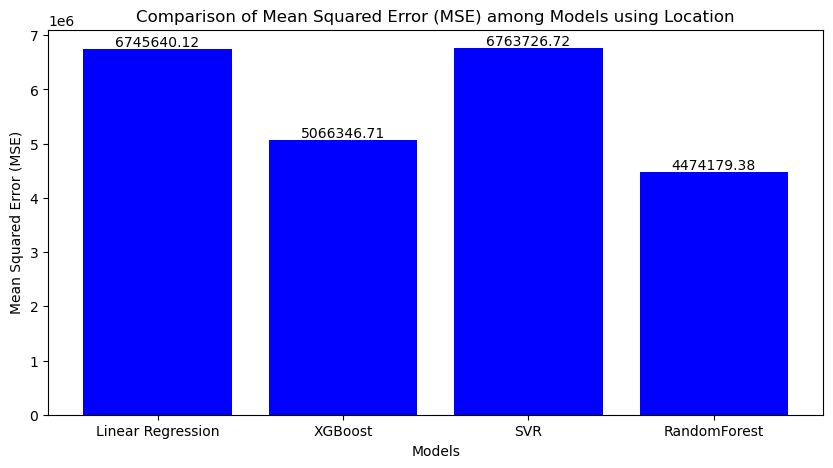

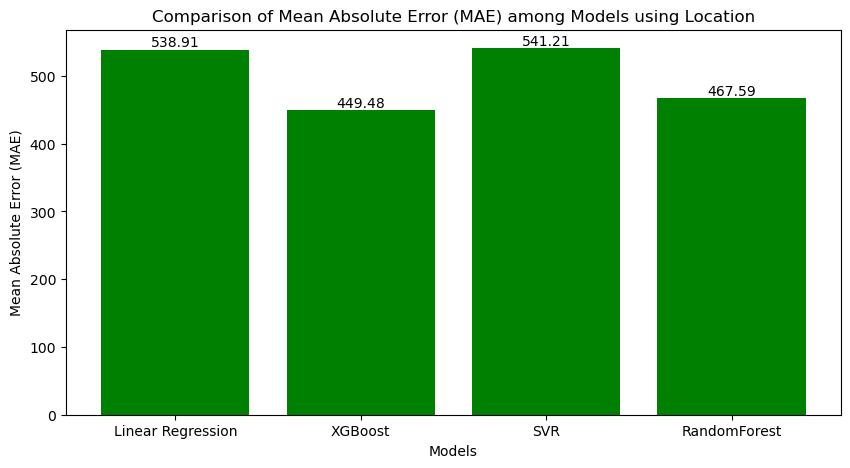

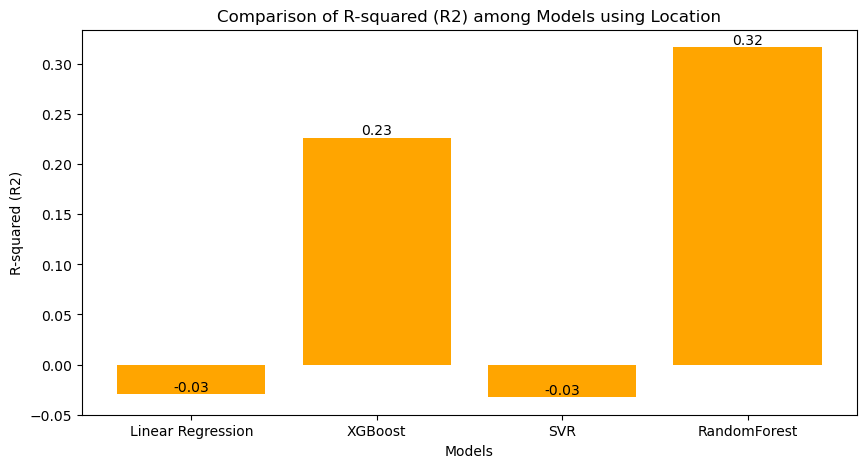

In [7]:
import matplotlib.pyplot as plt

# Create a list of model names and their respective metrics
models = ['Linear Regression', 'XGBoost', 'SVR', 'RandomForest']
mse_scores = [linear_mse, xgboost_mse, svr_mse, rf_mse]
mae_scores = [linear_mae, xgboost_mae, svr_mae,rf_mae]
r2_scores = [linear_r2, xgboost_r2, svr_r2,rf_r2]

# Plot Mean Squared Error (MSE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mse_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) among Models using Location')

# Add annotations to the bars
for bar, mse in zip(bars, mse_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

plt.show()


# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mae_scores, color='green')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) among Models using Location')
# Add annotations to the bars
for bar, mae in zip(bars, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

plt.show()

# Plot R-squared (R2)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, r2_scores, color='orange')
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) among Models using Location')
# Add annotations to the bars
for bar, r2 in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

plt.show()

